In [2]:
from sklearn import svm
from sklearn import neural_network
from sklearn import mixture
from sklearn import metrics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [88]:
# 0 - Male 
# 1 - Female
x_train = np.zeros((60,12)) 
y_train = np.zeros((60,1))
x_test = np.zeros((19,12)) 
y_test = np.zeros((19,1))
x_t = np.zeros((20,12))
y_t = np.zeros((20,1))

In [89]:
i=0
for c in os.listdir('./Dataset/Training/Male'):
    x = pd.read_csv('./Dataset/Training/Male/'+c, header=None)
    x_m = np.mean(x)
    x_train[i] = x_m
    y_train[i] = 0
    i=i+1
for c in os.listdir('./Dataset/Training/Female'):
    x = pd.read_csv('./Dataset/Training/Female/'+c, header=None)
    x_m = np.mean(x)
    x_train[i] = x_m
    y_train[i] = 1
    i=i+1

In [90]:
i=0
for c in os.listdir('./Dataset/Validation/Male'):
    x = pd.read_csv('./Dataset/Validation/Male/'+c, header=None)
    x_m = np.mean(x)
    x_test[i] = x_m
    y_test[i] = 0
    i=i+1
for c in os.listdir('./Dataset/Validation/Female'):
    x = pd.read_csv('./Dataset/Validation/Female/'+c, header=None)
    x_m = np.mean(x)
    x_test[i] = x_m
    y_test[i] = 1
    i=i+1

In [91]:
i=0
for c in os.listdir('./Dataset/Testing/Male'):
    x = pd.read_csv('./Dataset/Testing/Male/'+c, header=None)
    x_m = np.mean(x)
    x_t[i] = x_m
    y_t[i] = 0
    i=i+1
for c in os.listdir('./Dataset/Testing/Female'):
    x = pd.read_csv('./Dataset/Testing/Female/'+c, header=None)
    x_m = np.mean(x)
    x_t[i] = x_m
    y_t[i] = 1
    i=i+1

In [114]:
def classify(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    t_male = 0
    t_female = 0
    f_male = 0
    f_female = 0
    y_pred = model.predict(x_test)
    for i in range(len(y_test)):
        if y_test[i] == 0:
            if y_test[i]==y_pred[i]:
                t_male = t_male+1
            else:
                f_female = f_female+1
        elif y_test[i] == 1:
            if y_test[i] == y_pred[i]:
                t_female = t_female+1
            else:
                f_male = f_male+1
                
    print("Confusion Matrix:")            
    print("Predicted\Actual   Male    Female")
    print("Male                ",t_male,"    ",f_male)
    print("Female              ",f_female,"   ",t_female)
    print("Accuracy:",((t_male+t_female)/len(y_test)))
    print("Error Rate:",((f_male+f_female)/len(y_test)),"\n")
    print("Prediction of Males")
    print("-------------------")
    print("Precision:",(t_male/(t_male+f_male)))
    print("Recall:",(t_male/(t_male+f_female)),"\n")
    print("Prediction of Females")
    print("---------------------")
    print("Precision:",(t_female/(t_female+f_female)))
    print("Recall:",(t_female/(t_female+f_male)))

# SVM

In [177]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear','sigmoid']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print("Kernel:",i)
        print('Training data accuracy:', metrics.accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print('Validation data accuracy: ', metrics.accuracy_score(y_test,y_pred),'\n')
        rate.append(metrics.accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [178]:
k=svm_kernel(x_train,y_train,x_test,y_test)

Kernel: rbf
Training data accuracy: 1.0
Validation data accuracy:  0.6842105263157895 

Kernel: poly
Training data accuracy: 1.0
Validation data accuracy:  0.9473684210526315 

Kernel: linear
Training data accuracy: 1.0
Validation data accuracy:  1.0 

Kernel: sigmoid
Training data accuracy: 0.5
Validation data accuracy:  0.47368421052631576 

Highest accuracy is 1.0 occurs at linear kernel.


In [115]:
model=svm.SVC(kernel=k)
classify(model,x_train,y_train,x_t,y_t)

Confusion Matrix:
Predicted\Actual   Male    Female
Male                 8      0
Female               2     10
Accuracy: 0.9
Error Rate: 0.1 

Prediction of Males
-------------------
Precision: 1.0
Recall: 0.8 

Prediction of Females
---------------------
Precision: 0.8333333333333334
Recall: 1.0


# NN

In [126]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=i,activation='logistic',random_state=17,max_iter=20000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] != y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.0 occurs at hidden layer size=8.


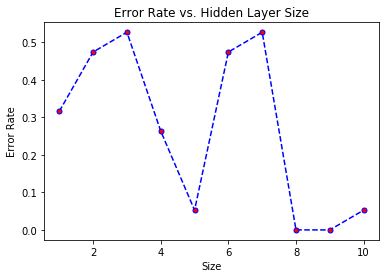

Confusion Matrix:
Predicted\Actual   Male    Female
Male                 9      0
Female               1     10
Accuracy: 0.95
Error Rate: 0.05 

Prediction of Males
-------------------
Precision: 1.0
Recall: 0.9 

Prediction of Females
---------------------
Precision: 0.9090909090909091
Recall: 1.0


In [179]:
h=nn_error(11,x_train,y_train,x_test,y_test)
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=h,activation='logistic',random_state=17,max_iter=20000)
classify(model,x_train,y_train,x_t,y_t)

# GMM

In [155]:
female_features = np.zeros((30,12))
male_features = np.zeros((30,12))
f=0
m=0
for i in range(len(y_train)):
    if y_train[i]==0:
        male_features[m]=x_train[i]
        m=m+1
    else:
        female_features[f]=x_train[i]
        f=f+1

In [165]:
def gmm_parameters (n,male_features,female_features,x_test,y_test):
    accuracy = []
    for c in range(1,n):
        females_gmm = mixture.GaussianMixture(n_components=c, covariance_type='full')
        males_gmm   = mixture.GaussianMixture(n_components=c, covariance_type='full')
        females_gmm.fit(female_features)
        males_gmm.fit(male_features)
        acc=0
        for i in range(len(y_test)):
            if y_test[i] == 0:
                if males_gmm.score([x_test[i]])>females_gmm.score([x_test[i]]):
                    acc=acc+1
            else:
                if females_gmm.score([x_test[i]])>males_gmm.score([x_test[i]]):
                    acc=acc+1
        accuracy.append((acc/len(y_test)))
        
    kloc = accuracy.index(max(accuracy))
    print("Highest accuracy is %s occurs at components=%s." % (accuracy[kloc], kloc+1))

    plt.plot(range(1,n), accuracy, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Number of Gaussian Components')
    plt.xlabel('Number of Gaussian components')
    plt.ylabel('Accuracy')
    plt.show()
    return kloc+1
                    

Highest accuracy is 0.8947368421052632 occurs at components=1.


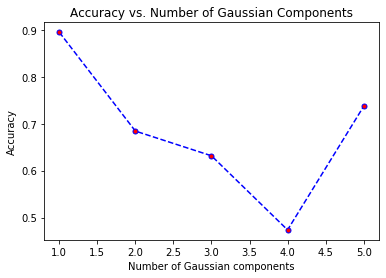

In [168]:
n = gmm_parameters (6,male_features,female_features,x_test,y_test)

In [169]:
females_gmm = mixture.GaussianMixture(n_components=n, covariance_type='full')
males_gmm   = mixture.GaussianMixture(n_components=n, covariance_type='full')
females_gmm.fit(female_features)
males_gmm.fit(male_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [172]:
t_male = 0
t_female = 0
f_male = 0
f_female = 0
for i in range(len(y_t)):
            if y_t[i] == 0:
                if males_gmm.score([x_t[i]])>females_gmm.score([x_t[i]]):
                    t_male = t_male+1
                else:
                    f_female = f_female+1
            else:
                if females_gmm.score([x_t[i]])>males_gmm.score([x_t[i]]):
                    t_female=t_female+1
                else:
                    f_male=f_male+1
print("Confusion Matrix:")            
print("Predicted\Actual   Male    Female")
print("Male                ",t_male,"    ",f_male)
print("Female              ",f_female,"   ",t_female)
print("Accuracy:",((t_male+t_female)/len(y_t)))
print("Error Rate:",((f_male+f_female)/len(y_t)),"\n")
print("Prediction of Males")
print("-------------------")
print("Precision:",(t_male/(t_male+f_male)))
print("Recall:",(t_male/(t_male+f_female)),"\n")
print("Prediction of Females")
print("---------------------")
print("Precision:",(t_female/(t_female+f_female)))
print("Recall:",(t_female/(t_female+f_male)))

Confusion Matrix:
Predicted\Actual   Male    Female
Male                 8      0
Female               2     10
Accuracy: 0.9
Error Rate: 0.1 

Prediction of Males
-------------------
Precision: 1.0
Recall: 0.8 

Prediction of Females
---------------------
Precision: 0.8333333333333334
Recall: 1.0
